In [18]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("diabetes.csv")

(train_inputs, test_inputs) = train_test_split(
    df, train_size=0.7, random_state=278805)


In [19]:
numeric_features = df[
    [
        "pregnant-times",
        "glucose-concentr",
        "blood-pressure",
        "skin-thickness",
        "insulin",
        "mass-index",
        "pedigree-func",
        "age",
    ]
]
target = df.pop("class")
target = target.map({"tested_positive": 1, "tested_negative": 0})
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(numeric_features)


In [20]:
def getModel(act, opt, ax):
    model = tf.keras.Sequential(
        [
            normalizer,
            tf.keras.layers.Dense(6, activation=act),
            tf.keras.layers.Dense(3, activation=act),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )

    model.compile(
        optimizer=opt,
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy"],
    )
    history = model.fit(
        numeric_features, target, epochs=500, validation_split=0.3, verbose=0,
        callbacks=[tensorboard_callback]
    )
    train_loss = history.history["loss"]
    test_loss = history.history["val_loss"]

    epochs = range(1, len(train_loss) + 1)

    ax.plot(epochs, train_loss, label="Train")
    ax.plot(epochs, test_loss, label="Test")
    ax.set_title(f"{act}/{opt}")
    return model, history, f"{act}/{opt}"
    return model, history, f"{act}/{opt}"

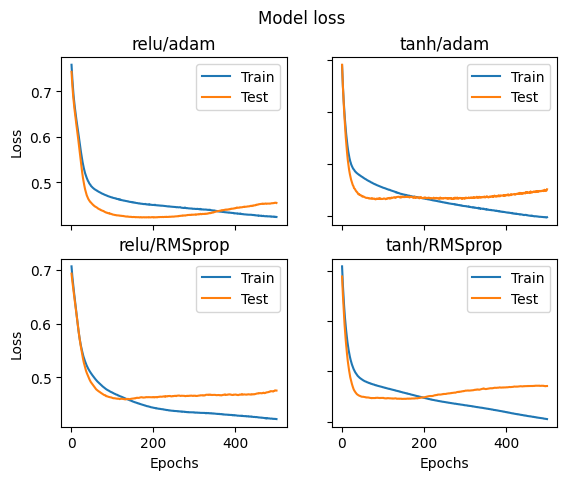

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("Model loss")
model1, history1, title1 = getModel("relu", "adam", ax1)
model2, history2, title2 = getModel("tanh", "adam", ax2)
model3, history3, title3 = getModel("relu", "RMSprop", ax3)
model4, history4, title4 = getModel("tanh", "RMSprop", ax4)
for ax in fig.get_axes():
    ax.set(xlabel="Epochs", ylabel="Loss")
    ax.legend()
    ax.label_outer()
plt.show()


Accuracy: 80.95%


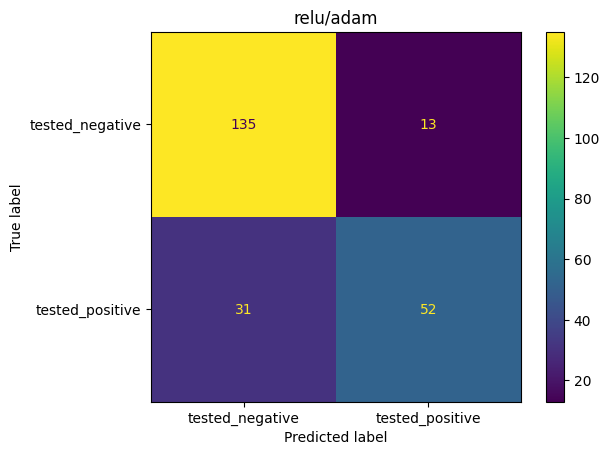

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

test_x = test_inputs[
    [
        "pregnant-times",
        "glucose-concentr",
        "blood-pressure",
        "skin-thickness",
        "insulin",
        "mass-index",
        "pedigree-func",
        "age",
    ]
]
test_y = test_inputs["class"]
test_y = test_y.map({"tested_positive": 1, "tested_negative": 0})


def getCM(model, title):
    y_pred = model.predict(test_x, verbose=0)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    print(f"Accuracy: {accuracy_score(test_y, y_pred) * 100:.2f}%")
    cm = confusion_matrix(test_y, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=[
            "tested_negative", "tested_positive"]
    )
    disp.plot()
    plt.title(title)
    plt.show()


getCM(model1, title1)

Accuracy: 82.68%


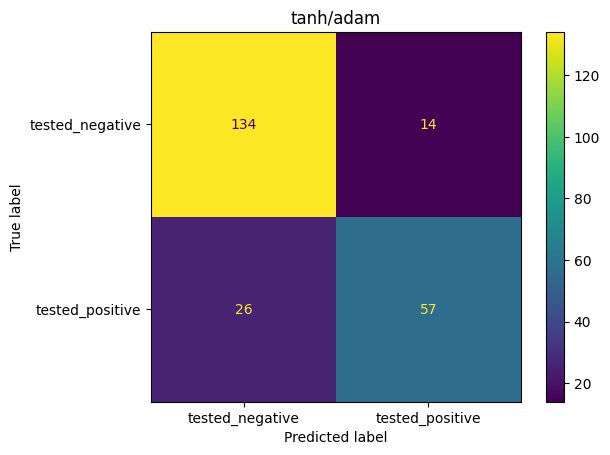

In [23]:
getCM(model2, title2)

Accuracy: 80.09%


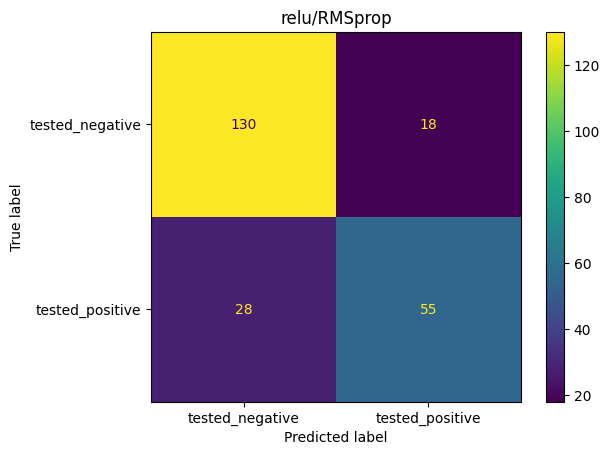

In [24]:
getCM(model3, title3)


Accuracy: 80.09%


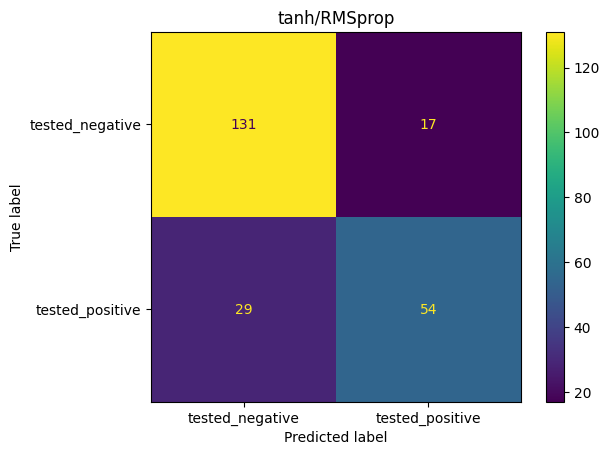

In [25]:
getCM(model4, title4)